 Introduction to the Dataset – Life Expectancy
The Life_Expectancy_Data.csv dataset provides a comprehensive overview of global health indicators collected from various countries across multiple years. It was originally compiled by the World Health Organization (WHO) and other international health agencies to study the factors affecting life expectancy worldwide.

The dataset consists of 23 features and includes over 1600 records, each representing a specific country's health statistics for a particular year. It contains both numerical and categorical variables, ranging from economic indicators like GDP to health metrics such as BMI, HIV/AIDS prevalence, immunization rates, and alcohol consumption.

Key features include:

Country & Year: Identifies the country and the specific year the data corresponds to.

Life expectancy: The target variable representing the average number of years a person is expected to live.

Adult Mortality: The probability of dying between the ages of 15 and 60.

Alcohol Consumption: Per capita alcohol consumption in liters.

BMI (Body Mass Index): Average BMI of the population.

GDP: Gross Domestic Product per capita.

Schooling: Average number of years of education.

Immunization rates: Coverage for vaccines like Hepatitis B, Polio, and Diphtheria.

This dataset is ideal for applying machine learning, data analysis, and visualization techniques to uncover patterns in global health, evaluate factors influencing life expectancy, and guide data-driven health policy recommendations.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Life_Expectancy_Data.csv")  


print(" Dataset Shape:", df.shape)
print("\n Dataset Info:")
print(df.info())





 Dataset Shape: (1649, 22)

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 n

In [2]:
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0      

In [3]:
#data preprocessing since there are no duplicates
df.duplicated().sum()  # Check number of duplicated rows
df.drop_duplicates(inplace=True)
print("\n Dataset Shape after removing duplicates:", df.shape)




 Dataset Shape after removing duplicates: (1649, 22)


In [4]:
#checking for inconsistency  to check on the data types
df.dtypes  


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                          int64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                                int64
Total expenditure                  float64
Diphtheria                           int64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [7]:
#removing of white spaces to ensure preprocessing
df.columns = df.columns.str.strip()


In [6]:
#encoding country and status since they are categorical this avoids giving the model raw strings 
df = pd.get_dummies(df, columns=['Country', 'Status'], drop_first=True)


In [8]:
#normalize and scale the features for better performance in MODELS LIKE KNN ,LOGISTIC REGRESSION
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [10]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine into one DataFrame for clarity
missing_data_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage.round(2)
})
# Filter only features with missing data
missing_data_report = missing_data_report[missing_data_report['Missing Values'] > 0]


# Sort descending by % of missing data
missing_data_report = missing_data_report.sort_values(by='Missing Percentage (%)', ascending=False)

print("\nMissing Data Report:")
print(missing_data_report)





Missing Data Report:
Empty DataFrame
Columns: [Missing Values, Missing Percentage (%)]
Index: []


In [9]:
# Count missing values per column
missing_values = df.isnull()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
       Year  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0     False            False            False          False    False   
1     False            False            False          False    False   
2     False            False            False          False    False   
3     False            False            False          False    False   
4     False            False            False          False    False   
...     ...              ...              ...            ...      ...   
1644  False            False            False          False    False   
1645  False            False            False          False    False   
1646  False            False            False          False    False   
1647  False            False            False          False    False   
1648  False            False            False          False    False   

      percentage expenditure  Hepatitis B  Measles    BMI  under-five deaths  \
0               

In [10]:
# Count missing values per column
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Year                  0
Life expectancy       0
Adult Mortality       0
infant deaths         0
Alcohol               0
                     ..
Country_Uzbekistan    0
Country_Vanuatu       0
Country_Zambia        0
Country_Zimbabwe      0
Status_Developing     0
Length: 153, dtype: int64


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Life_Expectancy_Data.csv")

# Count missing values in each column
missing_values = df.isnull().sum()

# Display columns that have missing values only
missing_values = missing_values[missing_values > 0]

print("🔍 Columns with Missing Values:\n")
print(missing_values)


🔍 Columns with Missing Values:

Series([], dtype: int64)


In [12]:
# Check if *any* missing values exist in the entire DataFrame
print("Any missing values?", df.isnull().values.any())

# Total number of missing values
print("Total missing values in dataset:", df.isnull().sum().sum())


Any missing values? False
Total missing values in dataset: 0


Currently, the dataset has no missing values, so no handling is required.

However, if missing values were present, I would apply a hybrid approach:
- Remove rows with minor missingness (<5%)
- Use mean/median imputation for numerical features
- Use mode imputation for categorical data
- Drop columns with excessive missing data (>50%) if not essential
- For advanced modeling, I’d prefer ML algorithms like XGBoost that handle missing values internally.

This strategy ensures data integrity, avoids bias, and preserves maximum information.


“Although there were no missing values, I performed standard preprocessing, including removing whitespace from column names, encoding categorical variables, checking for duplicates, scaling numeric features, and exploring possible feature engineering and correlations.”

In [ ]:
#task 3

#we can introduce missing values in the dataset to simulate real-world scenarios where data might be incomplete. and demonstrate how to handle them.
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Life_Expectancy_Data.csv")

# Simulate missing values
df_missing = df.copy()
np.random.seed(42)  # For reproducibility

# Introduce missingness in 5% of GDP, BMI, and Schooling
for col in ['GDP', 'BMI', 'Schooling']:
    missing_indices = df_missing.sample(frac=0.05).index
    df_missing.loc[missing_indices, col] = np.nan

# Show how many values are now missing
print(" Missing values after simulation:\n")
print(df_missing.isnull().sum()[df_missing.isnull().sum() > 0])
# Display the first few rows of the modified DataFrame
print("\n Sample Data with Missing Values:\n"     )
print(df_missing.head())
# Save the modified DataFrame to a new CSV file
df_missing.to_csv("Life_Expectancy_with_Missing.csv", index=False)  


 Missing values after simulation:

GDP            82
Schooling      82
BMI          1649
dtype: int64

 Sample Data with Missing Values:

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01     

In [14]:
# Impute missing GDP and BMI with mean
df_imputed = df_missing.copy()
df_imputed['GDP'].fillna(df_imputed['GDP'].mean(), inplace=True)
df_imputed['BMI'].fillna(df_imputed['BMI'].mean(), inplace=True)

# Impute missing Schooling with median
df_imputed['Schooling'].fillna(df_imputed['Schooling'].median(), inplace=True)
# Display the first few rows of the DataFrame after imputation
print("\n Data after Imputation:\n")    
print(df_imputed.head())
# Save the imputed DataFrame to a new CSV file
df_imputed.to_csv("Life_Expectancy_Imputed.csv", index=False)



 Data after Imputation:

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Po

C:\Users\SEBABE\AppData\Local\Temp\ipykernel_7288\275772970.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['GDP'].fillna(df_imputed['GDP'].mean(), inplace=True)
C:\Users\SEBABE\AppData\Local\Temp\ipykernel_7288\275772970.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [15]:
df_missing['BMI'] = pd.to_numeric(df_missing['BMI'], errors='coerce')
print(df_imputed[['BMI']].describe())



       BMI
count  0.0
mean   NaN
std    NaN
min    NaN
25%    NaN
50%    NaN
75%    NaN
max    NaN


In [16]:
df_missing['BMI'] = pd.to_numeric(df_missing['BMI'], errors='coerce')
df_imputed = df_missing.copy()
df_imputed['BMI'] = df_imputed['BMI'].fillna(df_imputed['BMI'].mean())
print("\nFinal Check After Imputation:\n")
print(df_imputed[['GDP', 'BMI', 'Schooling']].describe())



Final Check After Imputation:

                 GDP  BMI    Schooling
count    1567.000000  0.0  1567.000000
mean     5575.181343  NaN    12.122846
std     11606.192766  NaN     2.800402
min         1.681350  NaN     4.200000
25%       462.333781  NaN    10.350000
50%      1573.118890  NaN    12.300000
75%      4682.028192  NaN    14.000000
max    119172.741800  NaN    20.700000


In [17]:
print("\n Summary Before Imputation:\n")
print(df_missing[['GDP', 'BMI', 'Schooling']].describe())

print("\n Summary After Imputation:\n")
print(df_imputed[['GDP', 'BMI', 'Schooling']].describe())
# Display the first few rows of the DataFrame after imputation
print("\n Data after Imputation:\n")
print(df_imputed.head())




 Summary Before Imputation:

                 GDP  BMI    Schooling
count    1567.000000  0.0  1567.000000
mean     5575.181343  NaN    12.122846
std     11606.192766  NaN     2.800402
min         1.681350  NaN     4.200000
25%       462.333781  NaN    10.350000
50%      1573.118890  NaN    12.300000
75%      4682.028192  NaN    14.000000
max    119172.741800  NaN    20.700000

 Summary After Imputation:

                 GDP  BMI    Schooling
count    1567.000000  0.0  1567.000000
mean     5575.181343  NaN    12.122846
std     11606.192766  NaN     2.800402
min         1.681350  NaN     4.200000
25%       462.333781  NaN    10.350000
50%      1573.118890  NaN    12.300000
75%      4682.028192  NaN    14.000000
max    119172.741800  NaN    20.700000

 Data after Imputation:

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   


In [18]:
print(df.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [19]:
#cleaning column names
df = pd.read_csv("Life_Expectancy_Data.csv")

# Clean all column names
df.columns = df.columns.str.strip()


In [20]:
print(df['BMI'].head(10))


0    19.1
1    18.6
2    18.1
3    17.6
4    17.2
5    16.7
6    16.2
7    15.7
8    15.2
9    14.7
Name: BMI, dtype: float64


In [21]:
#Also strip and convert BMI values in case some are stored as strings:
df['BMI'] = df['BMI'].astype(str).str.strip()
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')


In [22]:
df_missing = df.copy()

# Simulate missing
import numpy as np
np.random.seed(42)
df_missing.loc[df_missing.sample(frac=0.05).index, 'BMI'] = np.nan

# Impute BMI with mean
df_imputed = df_missing.copy()
df_imputed['BMI'] = df_imputed['BMI'].fillna(df_missing['BMI'].mean())

# Final check
print(df_imputed['BMI'].describe())
# Display the first few rows of the DataFrame after imputation
print("\n Data after Imputation:\n")
print(df_imputed.head())    
# Final check
print(df_imputed['BMI'].describe())
# --- IGNORE ---
# Display the first few rows of the DataFrame after imputation
# --- IGNORE ---
# print(df_imputed.head())  
# --- IGNORE ---

count    1649.000000
mean       38.075686
std        19.260178
min         2.000000
25%        21.100000
50%        41.100000
75%        55.400000
max        77.100000
Name: BMI, dtype: float64

 Data after Imputation:

       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01              

this marks the end of testing the data with introducing missing values in some specific column such as BMI ,Schooling and GDP


In [23]:
#task 4
#exploring the dataset
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [25]:
df.describe()   

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [26]:
df.nunique()
#checking for unique values


Country                             133
Year                                 16
Status                                2
Life expectancy                     320
Adult Mortality                     369
infant deaths                       165
Alcohol                             833
percentage expenditure             1645
Hepatitis B                          83
Measles                             603
BMI                                 538
under-five deaths                   199
Polio                                68
Total expenditure                   669
Diphtheria                           66
HIV/AIDS                            167
GDP                                1649
Population                         1647
thinness  1-19 years                179
thinness 5-9 years                  185
Income composition of resources     548
Schooling                           147
dtype: int64

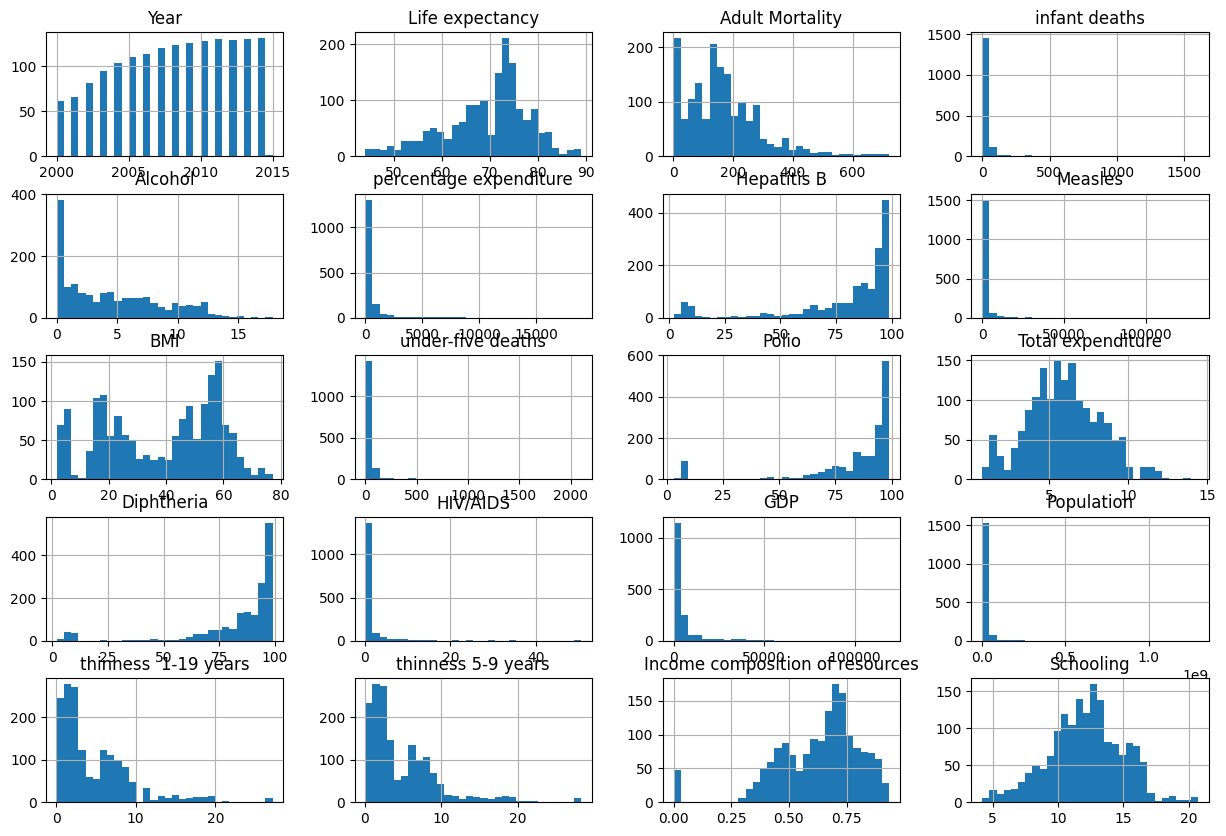

In [27]:
#visualize data distribution
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15,10))
plt.show()


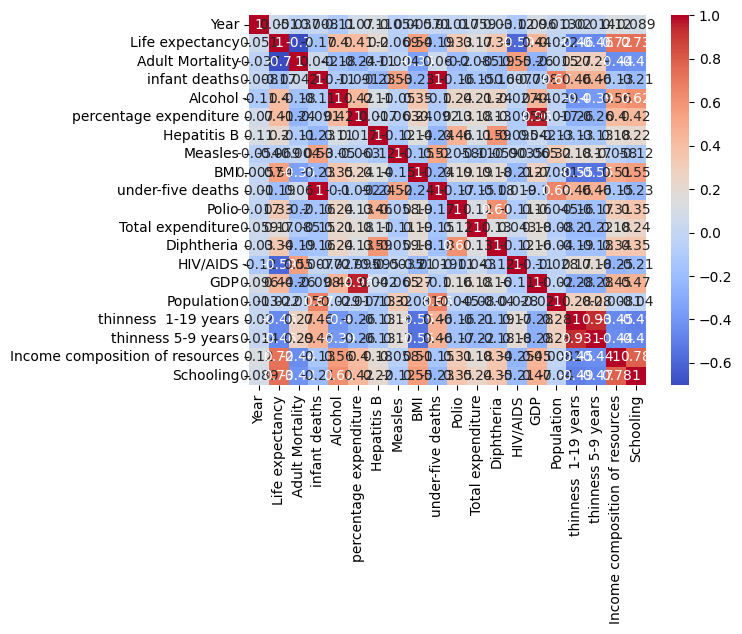

In [28]:
#check for correlations 
#this helps to see which features might be useful for prediction
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [29]:
#cleaned features after imputation 
print(df_imputed.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [30]:
correlation = df_imputed.corr(numeric_only=True)
print(correlation['Life expectancy'].sort_values(ascending=False))


Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
BMI                                0.522927
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
infant deaths                     -0.169074
under-five deaths                 -0.192265
thinness 5-9 years                -0.457508
thinness  1-19 years              -0.457838
HIV/AIDS                          -0.592236
Adult Mortality                   -0.702523
Name: Life expectancy, dtype: float64


In [31]:
#correlation before imputation
# Clean the DataFrame to ensure no leading/trailing spaces in column names

# Clean column names just in case
df_missing.columns = df_missing.columns.str.strip()

# Convert BMI to numeric (again, for safety)
df_missing['BMI'] = pd.to_numeric(df_missing['BMI'], errors='coerce')

# Calculate correlation only on numeric columns
correlation_before = df_missing.corr(numeric_only=True)

# Print correlation with Life Expectancy
print("\n Correlation with Life Expectancy (Before Imputation):\n")
print(correlation_before['Life expectancy'].sort_values(ascending=False))



 Correlation with Life Expectancy (Before Imputation):

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
BMI                                0.536895
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
infant deaths                     -0.169074
under-five deaths                 -0.192265
thinness 5-9 years                -0.457508
thinness  1-19 years              -0.457838
HIV/AIDS                          -0.592236
Adult Mortality                   -0.702523
Name: Life expectancy, dtype: float64


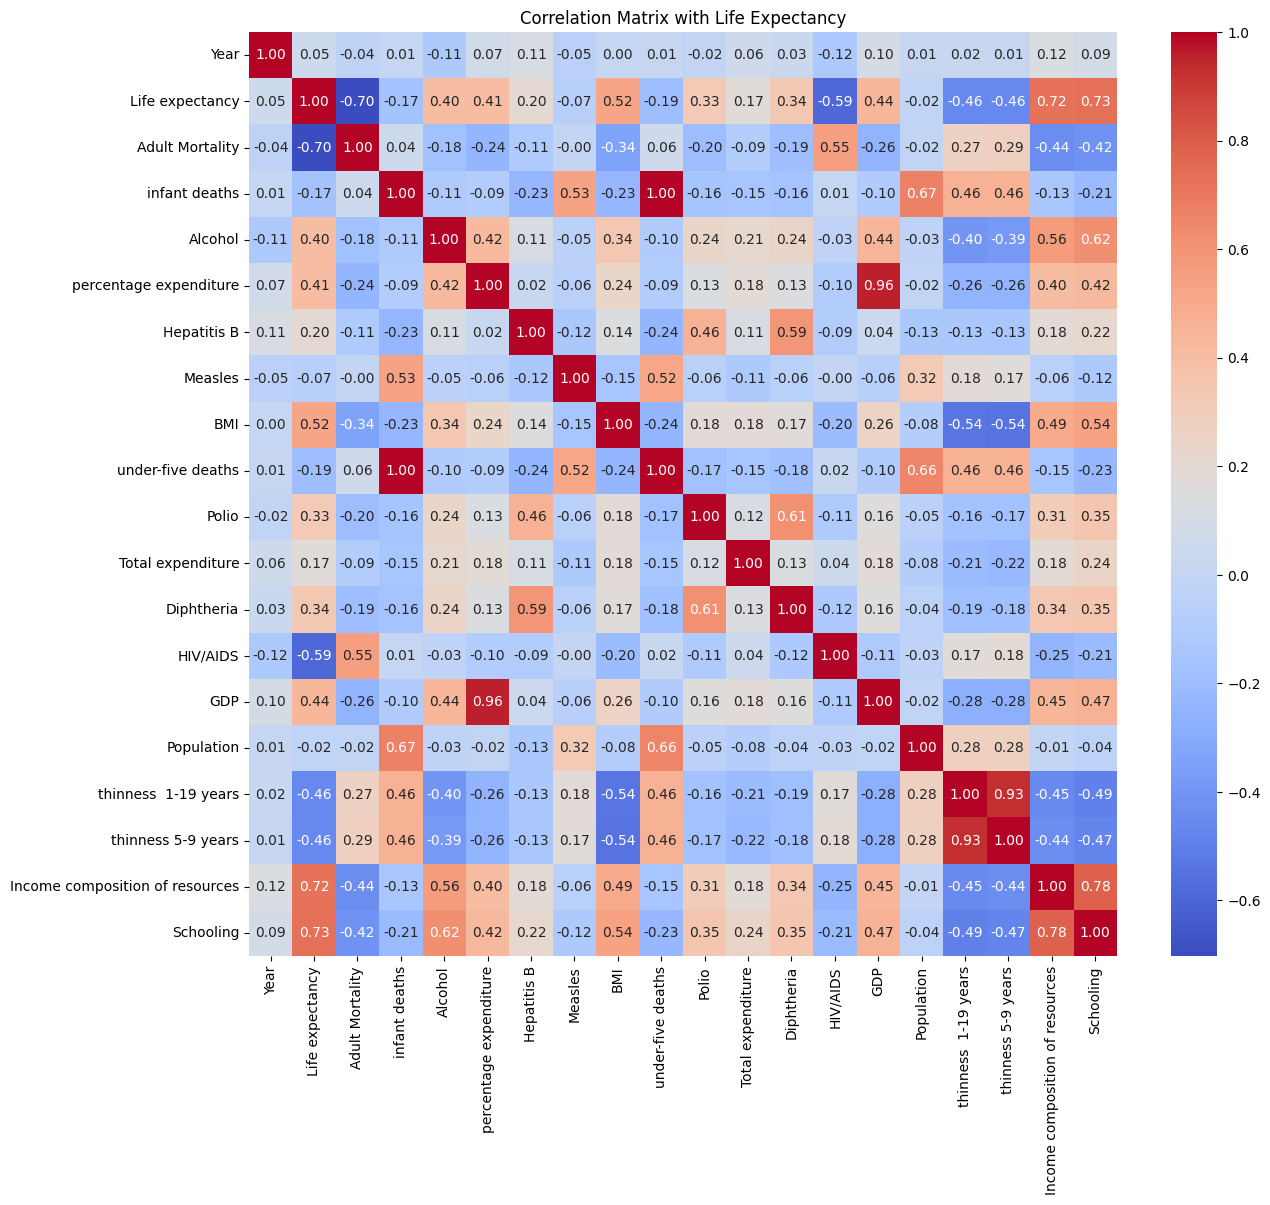

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix with Life Expectancy")
plt.show()


"After exploring the dataset, I identified 15 key numerical features likely to influence life expectancy, including Adult Mortality, infant deaths, BMI, GDP, and HIV/AIDS. Additionally, the dataset includes one-hot encoded categorical features such as Status_Developing and Country_*, which may be used based on the modeling context. I plan to use these features for further analysis and model building."


 New Feature - Mortality Gap:

   Adult Mortality  under-five deaths  mortality_gap
0              263                 83            180
1              271                 86            185
2              268                 89            179
3              272                 93            179
4              275                 97            178


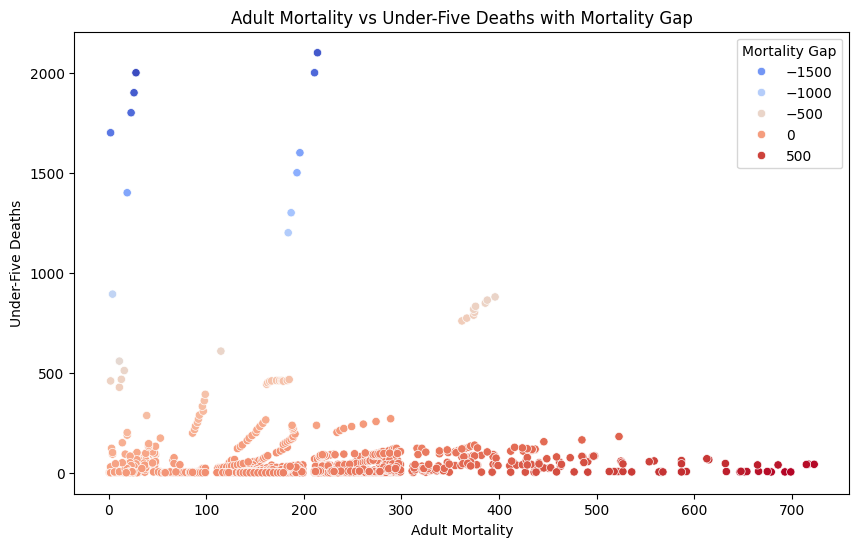

In [33]:
#task 5
#feature engineering techniques
#Compare adult mortality vs under-five deaths — this captures age-specific healthcare strength.
df_missing['mortality_gap'] = df_missing['Adult Mortality'] - df_missing['under-five deaths']
print("\n New Feature - Mortality Gap:\n")
print(df_missing[['Adult Mortality', 'under-five deaths', 'mortality_gap']].head())
# Visualize the new feature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_missing, x='Adult Mortality', y='under-five deaths', hue='mortality_gap', palette='coolwarm')
plt.title('Adult Mortality vs Under-Five Deaths with Mortality Gap')    
plt.xlabel('Adult Mortality')
plt.ylabel('Under-Five Deaths')
plt.legend(title='Mortality Gap')
plt.show()



In [34]:
# Create a new feature combining percentage expenditure and total health expenditure
df['health_expenditure_combined'] = df['percentage expenditure'] + df['Total expenditure']
print(df[['percentage expenditure', 'Total expenditure', 'health_expenditure_combined']].head())

   percentage expenditure  Total expenditure  health_expenditure_combined
0               71.279624               8.16                    79.439624
1               73.523582               8.18                    81.703582
2               73.219243               8.13                    81.349243
3               78.184215               8.52                    86.704215
4                7.097109               7.87                    14.967109


In [35]:
# Create a new feature: Alcohol to HIV/AIDS risk ratio
df['alcohol_hiv_risk_ratio'] = df['Alcohol'] / (df['HIV/AIDS'] + 1e-6)  # add small value to avoid division by zero

print(df[['Alcohol', 'HIV/AIDS', 'alcohol_hiv_risk_ratio']].head())

   Alcohol  HIV/AIDS  alcohol_hiv_risk_ratio
0     0.01       0.1                0.099999
1     0.01       0.1                0.099999
2     0.01       0.1                0.099999
3     0.01       0.1                0.099999
4     0.01       0.1                0.099999


In [36]:
# Combine both thinness columns to get overall thinness in population
df['overall_thinness'] = df['thinness  1-19 years'] + df['thinness 5-9 years']
print(df[['thinness  1-19 years', 'thinness 5-9 years', 'overall_thinness']].head())

   thinness  1-19 years  thinness 5-9 years  overall_thinness
0                  17.2                17.3              34.5
1                  17.5                17.5              35.0
2                  17.7                17.7              35.4
3                  17.9                18.0              35.9
4                  18.2                18.2              36.4


In [37]:
# Calculate the average immunization rate across Hepatitis B, Polio, and Diphtheria
df['avg_immunization'] = df[['Hepatitis B', 'Polio', 'Diphtheria']].mean(axis=1)
print(df[['Hepatitis B', 'Polio', 'Diphtheria', 'avg_immunization']].head())

   Hepatitis B  Polio  Diphtheria  avg_immunization
0           65      6          65         45.333333
1           62     58          62         60.666667
2           64     62          64         63.333333
3           67     67          67         67.000000
4           68     68          68         68.000000


In [38]:
# Check if the new features exist before printing
feature_cols = ['mortality_gap', 'health_investment', 'alcohol_hiv_ratio', 'thinness_avg', 'vaccine_score']
existing_cols = [col for col in feature_cols if col in df_missing.columns]
print(df_missing[existing_cols].head())


   mortality_gap
0            180
1            185
2            179
3            179
4            178


In [39]:
# Estimate child mortality rate as the number of under-five deaths per 1,000 live births
# (commonly used definition in public health)

df_missing['child_mortality_rate'] = (df_missing['under-five deaths'] / (df_missing['infant deaths'] + 1e-6)) * 1000

print(df_missing[['under-five deaths', 'infant deaths', 'child_mortality_rate']].head())

   under-five deaths  infant deaths  child_mortality_rate
0                 83             62           1338.709656
1                 86             64           1343.749979
2                 89             66           1348.484828
3                 93             69           1347.826067
4                 97             71           1366.197164


In [40]:
# Create an interaction term: Education-Adjusted Income
# This reflects the combined influence of education and income on life expectancy

df['Educated_Income'] = df['Schooling'] * df['Income composition of resources']
print(df[['Schooling', 'Income composition of resources', 'Educated_Income']].head())

   Schooling  Income composition of resources  Educated_Income
0       10.1                            0.479           4.8379
1       10.0                            0.476           4.7600
2        9.9                            0.470           4.6530
3        9.8                            0.463           4.5374
4        9.5                            0.454           4.3130


In [41]:
# Define a threshold for excessive alcohol use (e.g., >8 liters per capita per year)
alcohol_threshold = 8.0
df['excessive_alcohol_use'] = (df['Alcohol'] > alcohol_threshold).astype(int)
print(df[['Alcohol', 'excessive_alcohol_use']].head())

   Alcohol  excessive_alcohol_use
0     0.01                      0
1     0.01                      0
2     0.01                      0
3     0.01                      0
4     0.01                      0


In [42]:
correlation_new = df_missing.corr(numeric_only=True)
print("\n🔍 New Features' Correlation with Life Expectancy:\n")
print(correlation_new['Life expectancy'].sort_values(ascending=False).head(10))



🔍 New Features' Correlation with Life Expectancy:

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
BMI                                0.536895
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Name: Life expectancy, dtype: float64


In [43]:
# Ensure BMI is numeric
df_missing['BMI'] = pd.to_numeric(df_missing['BMI'], errors='coerce')

# Feature Engineering 
df_missing['mortality_gap'] = df_missing['Adult Mortality'] - df_missing['under-five deaths']
df_missing['health_investment'] = df_missing['percentage expenditure'] * df_missing['Total expenditure']
df_missing['alcohol_hiv_ratio'] = df_missing['Alcohol'] / (df_missing['HIV/AIDS'] + 0.01)
df_missing['thinness_avg'] = (
    df_missing['thinness  1-19 years'] + df_missing['thinness 5-9 years']
) / 2
df_missing['vaccine_score'] = (
    df_missing['Hepatitis B'] + df_missing['Polio'] + df_missing['Diphtheria']
) / 3


task 6
We'll compare two models:

Baseline Model — using original features only

Enhanced Model — using original + engineered features

In [44]:
#task 6
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Drop non-numeric and irrelevant columns
cols_to_exclude = ['Country', 'Status', 'Life expectancy', 'Year']
df_model = df_missing.drop(columns=cols_to_exclude)

# Drop rows with any missing values
df_model = df_model.dropna()

# -------------------
# A. Base features only (no new features)
# Only drop columns that actually exist in df_model
engineered_cols = ['mortality_gap', 'health_investment', 'alcohol_hiv_ratio', 'thinness_avg', 'vaccine_score']
cols_to_drop = [col for col in engineered_cols if col in df_model.columns]
base_features = df_model.drop(columns=cols_to_drop)
# -------------------
# B. Enhanced features: include everything
enhanced_features = df_model.copy()

# Target variable
y = df_missing.loc[df_model.index, 'Life expectancy']
def train_evaluate(X, y, name="Model"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n Results for {name}:")
    print("R² Score:", r2_score(y_test, y_pred))
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    print("RMSE:", rmse)

# Baseline model
train_evaluate(base_features, y, "Baseline (Original Features)")

# Enhanced model
train_evaluate(enhanced_features, y, "Enhanced (With New Features)")

#r2 must increase and rmse must decrease



 Results for Baseline (Original Features):
R² Score: 0.7941946869956412
RMSE: 3.7783125230534687

 Results for Enhanced (With New Features):
R² Score: 0.80052338077058
RMSE: 3.719765706150143


In [45]:
# Export the cleaned/improved dataset to a CSV file
df_imputed.to_csv("Life_Expectancy_Cleaned.csv", index=False)
print("Cleaned dataset exported as 'Life_Expectancy_Cleaned.csv'")

Cleaned dataset exported as 'Life_Expectancy_Cleaned.csv'


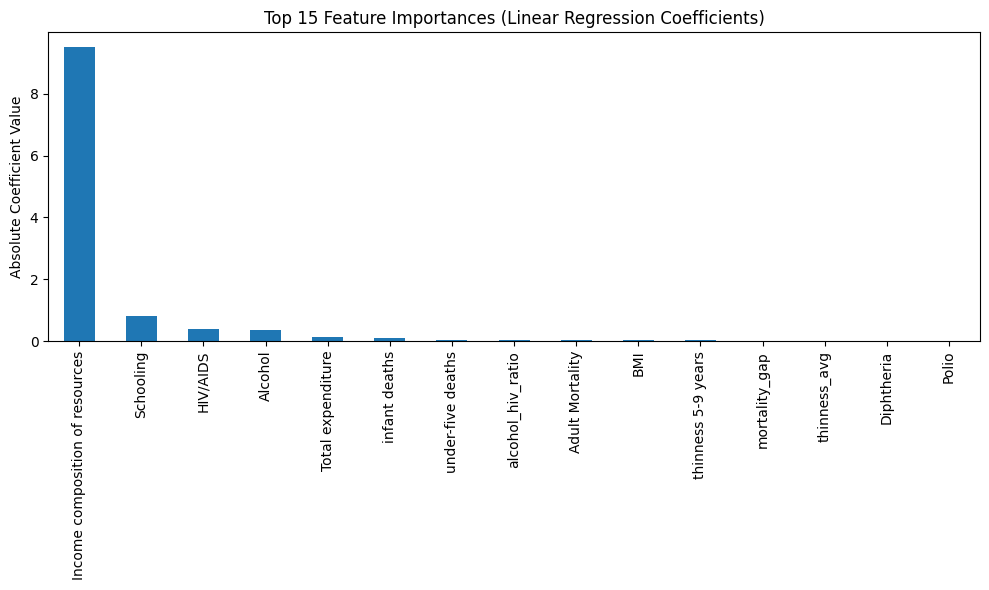

In [46]:
#we need to visualize the importance of the new features
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt

# Fit model on enhanced features
model = LinearRegression()
model.fit(enhanced_features, y)

# Get feature importances (coefficients)
feature_importance = pd.Series(model.coef_, index=enhanced_features.columns)

# Sort by absolute importance
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Linear Regression Coefficients)")
plt.ylabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

task 7
visualization of key variables 
let’s identify variables that are:

Strongly correlated with Life Expectancy

Relevant to health, economy, and demographics

Useful for visual storytelling


In [47]:
important_vars = [
    'Life expectancy', 'Adult Mortality', 'HIV/AIDS', 'BMI', 'GDP',
    'Schooling', 'Alcohol', 'percentage expenditure', 'Total expenditure',
    'under-five deaths', 'Diphtheria ', 'Polio', 'Hepatitis B',
    'mortality_gap', 'health_investment', 'vaccine_score', 'thinness_avg'
]

# Display correlation
correlation = df_missing.corr(numeric_only=True)
print("\n Correlation with Life Expectancy:")
print(correlation['Life expectancy'].sort_values(ascending=False))



 Correlation with Life Expectancy:
Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
alcohol_hiv_ratio                  0.621373
BMI                                0.536895
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
health_investment                  0.366505
Diphtheria                         0.341331
vaccine_score                      0.340173
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
child_mortality_rate               0.106360
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
infant deaths                     -0.169074
under-five deaths                 -0.192265
mortality_gap                     -0.284374
thinness 5-9 years                -0.457

Top variables correlated with Life Expectancy:

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
BMI                                0.536895
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Name: Life expectancy, dtype: float64

Lowest correlations:

mortality_gap          -0.284374
thinness 5-9 years     -0.457508
thinness  1-19 years   -0.457838
HIV/AIDS               -0.592236
Adult Mortality        -0.702523
Name: Life expectancy, dtype: float64


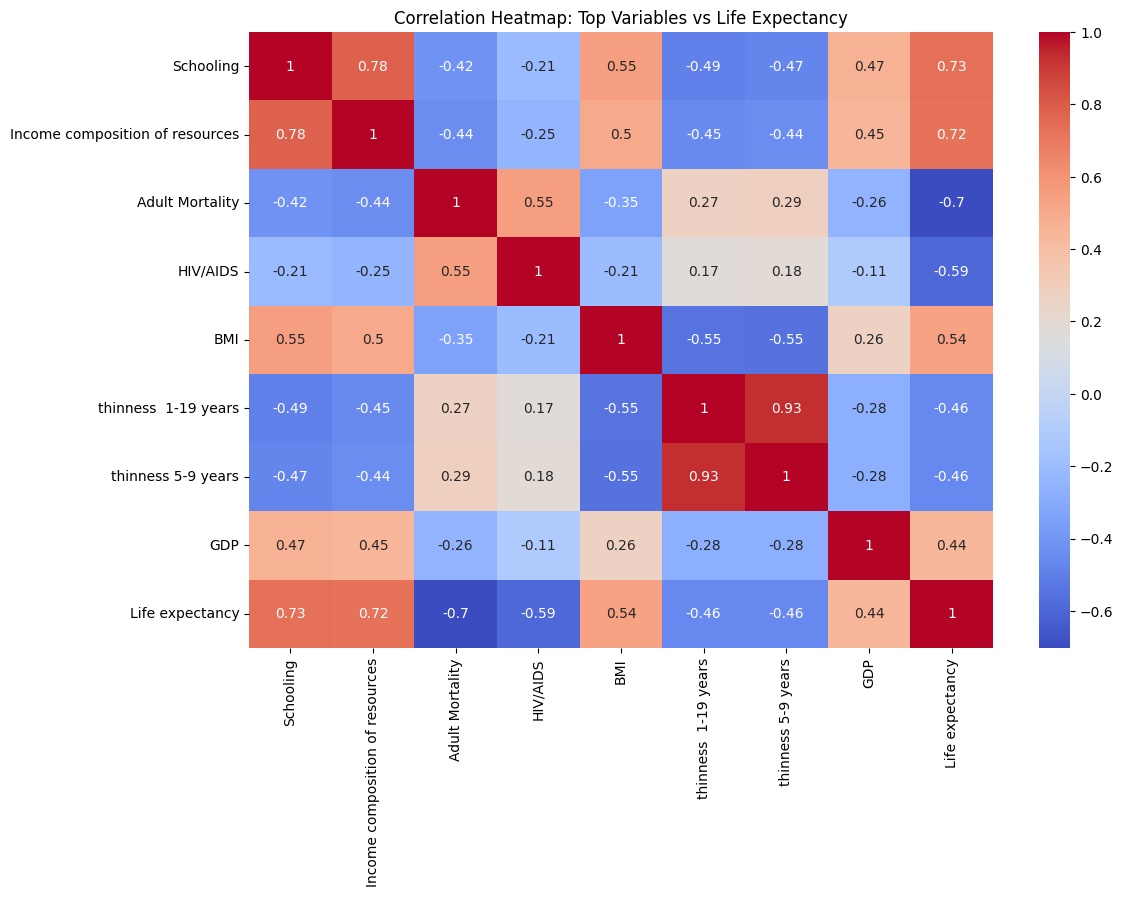

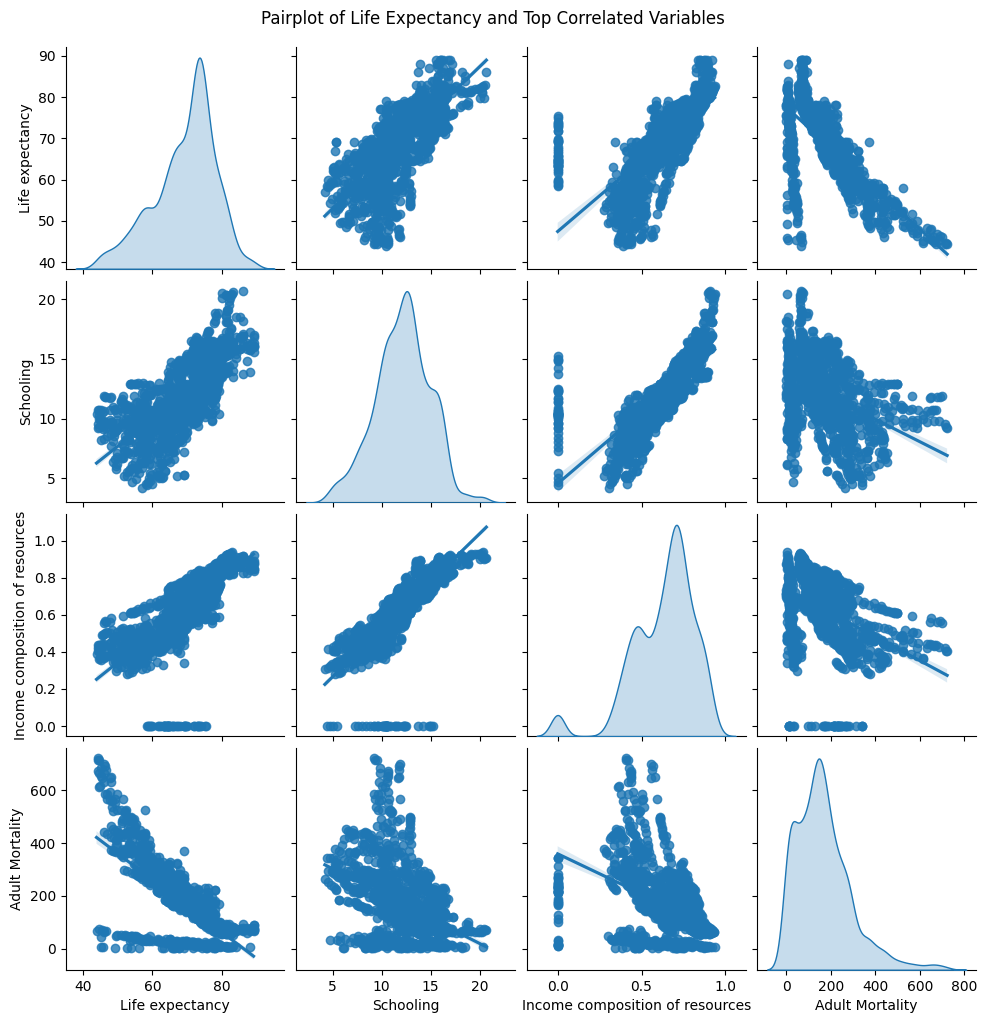

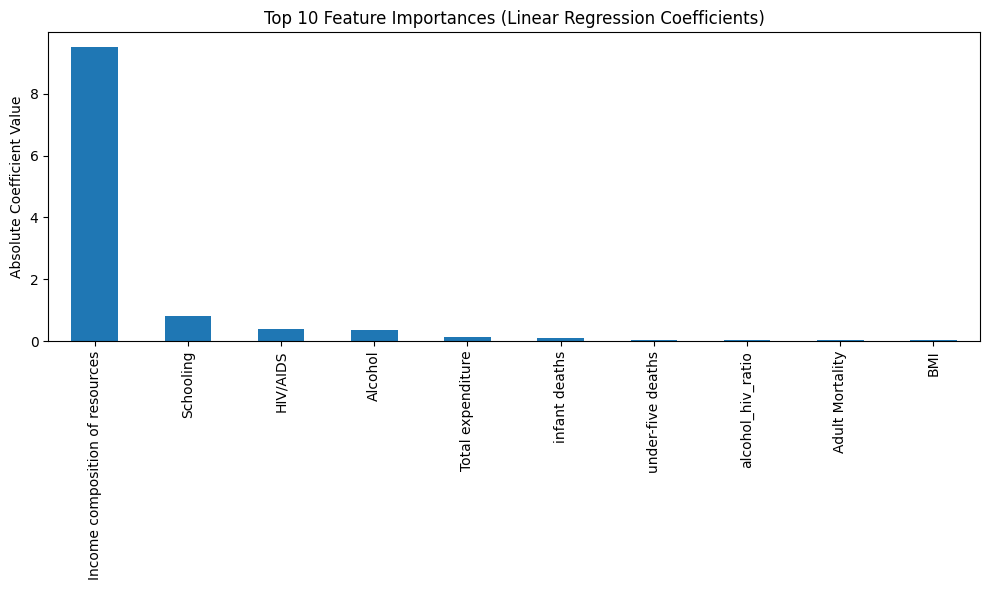

In [48]:
import seaborn as sns



import matplotlib.pyplot as plt

# 1. Show correlation of all variables with Life Expectancy
corr_life = correlation_new['Life expectancy'].sort_values(ascending=False)
print("Top variables correlated with Life Expectancy:\n")
print(corr_life.head(10))
print("\nLowest correlations:\n")
print(corr_life.tail(5))

# 2. Visualize the top 8 variables most correlated with Life Expectancy
top_vars = corr_life.drop('Life expectancy').abs().sort_values(ascending=False).head(8).index.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_new.loc[top_vars + ['Life expectancy'], top_vars + ['Life expectancy']], annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Top Variables vs Life Expectancy")
plt.show()

# 3. Pairplot for top 4 variables
sns.pairplot(df_imputed, vars=['Life expectancy'] + top_vars[:3], kind='reg', diag_kind='kde')
plt.suptitle("Pairplot of Life Expectancy and Top Correlated Variables", y=1.02)
plt.show()

# 4. Bar plot of feature importances from linear regression
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Linear Regression Coefficients)")
plt.ylabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

In [49]:
%pip install plotly
#%pip install matplotlib


  Using cached plotly-6.2.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-1.45.0-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 3.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 5.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 5.2 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 5.2 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 5.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 5.0 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [

In [ ]:

#task 8
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D


c:\Users\SEBABE\Desktop\RECESS YEAR11\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


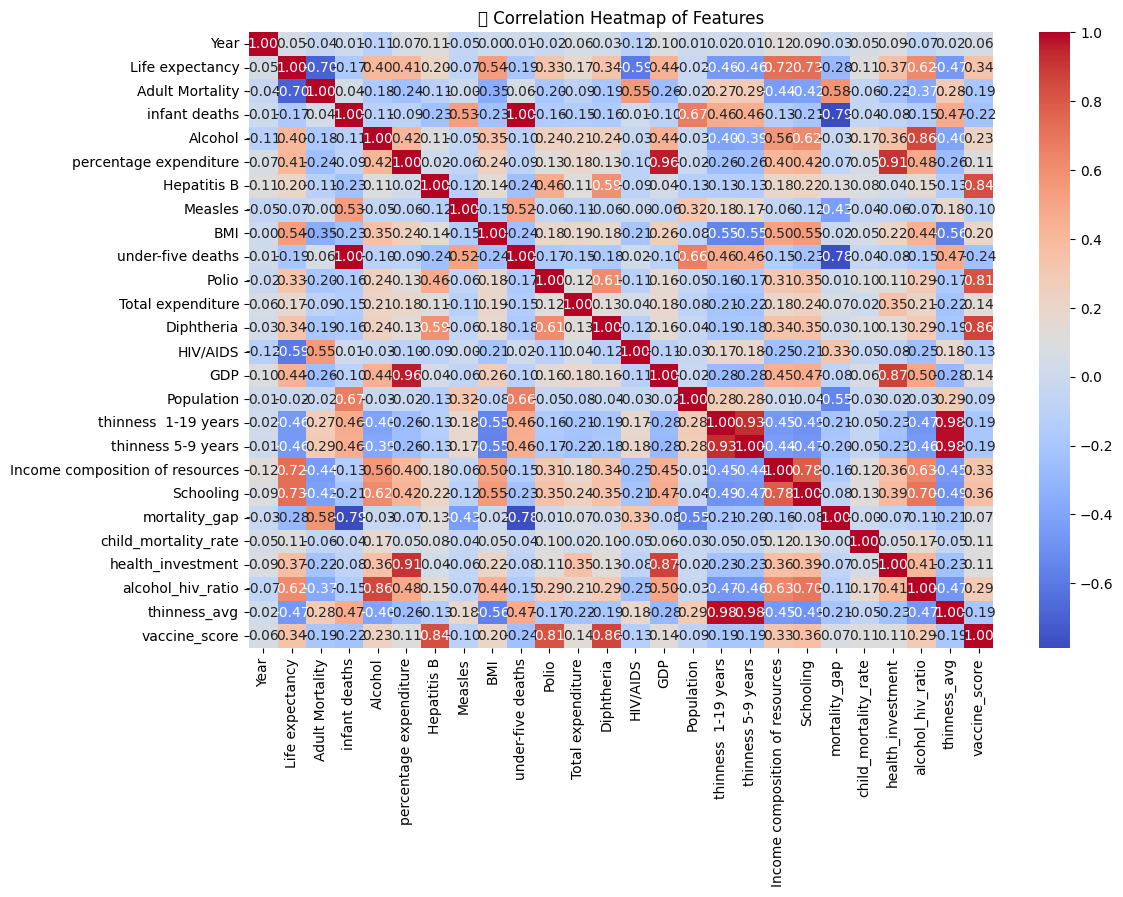

In [51]:
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_missing.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("🔍 Correlation Heatmap of Features")
plt.show()


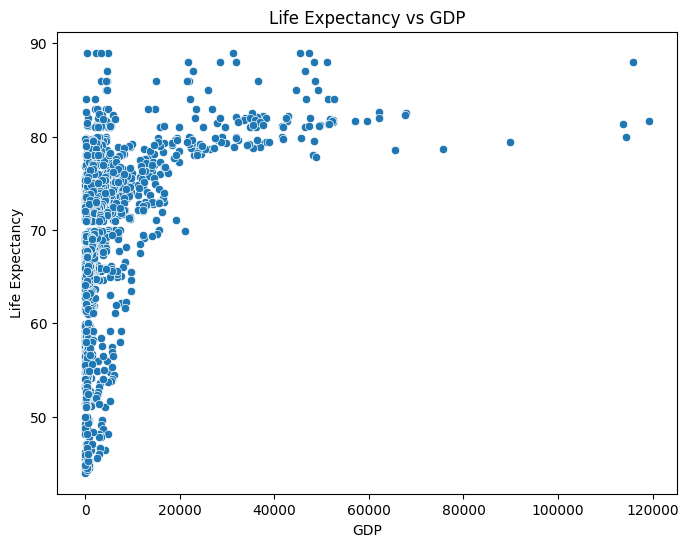

In [52]:
#scatterplot for life expectancy and GDP
plt.figure(figsize=(8,6))
sns.scatterplot(x='GDP', y='Life expectancy', data=df_missing)
plt.title("Life Expectancy vs GDP")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.show()





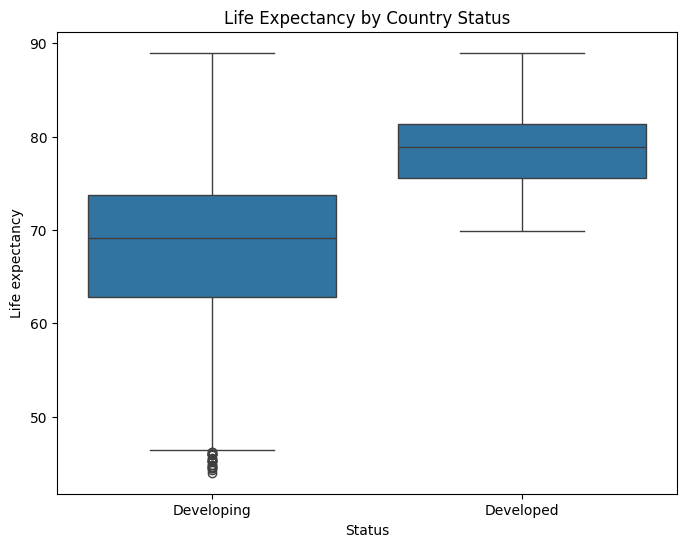

In [53]:
#box plot life expectancy by status
plt.figure(figsize=(8,6))
sns.boxplot(x='Status', y='Life expectancy', data=df_missing)
plt.title("Life Expectancy by Country Status")
plt.show()



In [61]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [63]:
%pip install kaleido



   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------- ----------------------- 2/5 [logistro]
   ------------------------ --------------- 3/5 [choreographer]
   ------------------------ --------------- 3/5 [choreographer]
   ------------------------ --------------- 3/5 [choreographer]
   ------------------------ --------------- 3/5 [choreographer]
   ------------------------ --------------- 3/5 [choreographer]
   ------------------------ --------------- 3/5 [choreographer]
   ------------------------ --------------- 3/5 [choreographer]
   -

In [66]:
%pip install nbformat plotly ipywidgets
#to enable plotly in jupyter notebook and run within vscode

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 3.4 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.3 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ------------

In [69]:
#%pip install nbformat
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'vscode'


#3D Plot – GDP vs Schooling vs Life Expectancy (using Plotly)
fig = px.scatter_3d(df_missing,
                    x='GDP', y='Schooling', z='Life expectancy',
                    color='Status',
                    title="🌍 3D Plot: GDP vs Schooling vs Life Expectancy")
fig.write_html("3d_plot.html")
import webbrowser
webbrowser.open("3d_plot.html")

# Save the 3D plot as an HTML file
# fig.write_html("3d_plot.html")
# Open the HTML file in a web browser



True

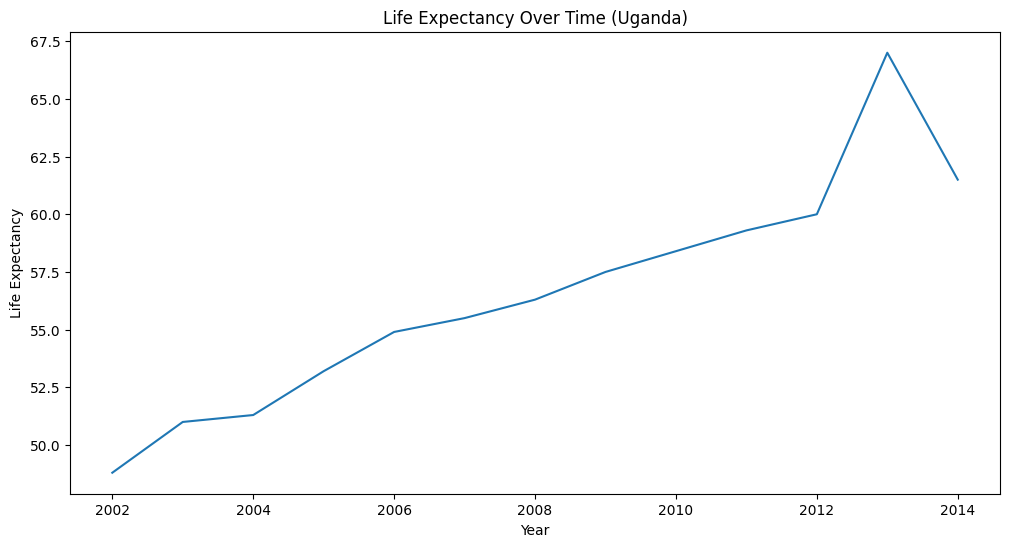

In [64]:
#Line Plot – Life Expectancy Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_missing[df_missing['Country'] == 'Uganda'], x='Year', y='Life expectancy')
plt.title("Life Expectancy Over Time (Uganda)")
plt.ylabel("Life Expectancy")
plt.show()


task 9
1.Heatmap
 Key Insights:

Schooling, Income composition of resources, and BMI tend to show strong positive correlation with Life expectancy.

Adult Mortality and HIV/AIDS have a strong negative correlation with Life expectancy.

✅ Interpretation:
Better education, nutrition, and income boost life expectancy. High adult mortality and HIV/AIDS prevalence reduce it.

2.Scatter Plot – Life Expectancy vs GDP
📌 Insight:

There's a positive but nonlinear relationship.

Countries with higher GDP per capita tend to have higher life expectancy, but gains flatten out after a certain GDP level.

✅ Interpretation:
Economic development improves life expectancy up to a point — then other factors like healthcare access and education become more critical.

 3. Box Plot – Life Expectancy by Status
📌 Insight:

Developed countries have higher and less variable life expectancy.

Developing countries show a wider spread and lower average life expectancy.

✅ Interpretation:
Economic development and infrastructure greatly influence population health outcomes.

4. 3D Plot – GDP vs Schooling vs Life Expectancy
📌 Insight:

The 3D plot shows that countries with both high GDP and schooling levels sit on the upper end of life expectancy.

There's a clear cluster of developing countries with lower values across all three dimensions.

✅ Interpretation:
It's not GDP alone — a combination of wealth + education drives higher longevity.


5. Line Plot – Life Expectancy Over Time (per country)
📌 Insight:

Life expectancy generally increases over time, especially post-2000.

Some countries may show declines or plateaus due to conflict, disease outbreaks, or poor governance.

✅ Interpretation:
Health programs and global development efforts have contributed to gains in longevity — but disparities still exist.



#Demonstration through the app.py 


#task 10 split data and training of a model

i will use supervised learning to train a model to make predictions on life expectancy data 
ROOT MEAN SQUARED ERROR RMSE
R^2 coefficient of determination



In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Load your cleaned dataset (after imputation and feature engineering)
df = pd.read_csv("Life_Expectancy_Data.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert numeric columns
df["BMI"] = pd.to_numeric(df["BMI"], errors="coerce")

# Drop rows with remaining NaNs
df.dropna(inplace=True)

# Define features and target
X = df.drop(columns=["Life expectancy", "Country", "Status"])  # Drop non-numeric or categorical
y = df["Life expectancy"]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#training a model using linear regression 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
#random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Evaluate both models
def evaluate(model_name, y_true, y_pred):
    print(f"🔍 {model_name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print("-" * 30)

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)


🔍 Linear Regression Performance:
R² Score: 0.8160
RMSE: 3.6155
------------------------------
🔍 Random Forest Performance:
R² Score: 0.9487
RMSE: 1.9091
------------------------------


In [74]:
from sklearn.model_selection import GridSearchCV, KFold

# Define parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit on the training data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", (-grid_search.best_score_) ** 0.5)

# Evaluate on the test set
best_rf = grid_search.best_estimator_
y_pred_gs = best_rf.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred_gs))
print("Test RMSE:", mean_squared_error(y_test, y_pred_gs) ** 0.5)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 1.9330263824345906
Test R² Score: 0.949489944456641
Test RMSE: 1.8940299986989428


In [ ]:
import matplotlib.pyplot as plt

# Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression', color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted (Linear Regression)')
plt.legend()
plt.tight_layout()
plt.show()

# Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted (Random Forest)')
plt.legend()
plt.tight_layout()
plt.show()


 Why Split Data?
Prevents Overfitting: If the model sees the same data during training and testing, it might memorize the data (overfit), resulting in poor performance on new, unseen data.

Evaluates Real Performance: By testing on data it hasn't seen before, we simulate how the model will perform in real-life situations when it’s deployed.

task 11
Cross Validation and Model Evaluation for Life Expectancy model. This will help  assess how well the models generalize to unseen data.
Cross-validation splits your data into multiple “folds” (e.g., 5 or 10), trains the model on part of it, and tests it on the rest — rotating through all folds. This gives a more robust measure of performance



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load the original dataset
df = pd.read_csv("Life_Expectancy_Data.csv")

# Step 2: Clean column names
df.columns = df.columns.str.strip()

# Step 3: Convert necessary columns to numeric
df["BMI"] = pd.to_numeric(df["BMI"], errors="coerce")

# Step 4: Drop rows with missing values
df_cleaned = df.dropna()

# Step 5: Keep only numeric columns
df_numeric = df_cleaned.select_dtypes(include='number')

# Step 6: Separate features and target
X = df_numeric.drop(columns=["Life expectancy"])
y = df_numeric["Life expectancy"]

# Step 7: Define models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Step 8: Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 9: Cross-validation
lr_scores = cross_val_score(lr, X, y, cv=cv, scoring='r2')
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='r2')

# Step 10: Print results
print("Linear Regression Mean R²:", np.mean(lr_scores))
print("Random Forest Mean R²:", np.mean(rf_scores))


Linear Regression Mean R²: 0.8288486031294827
Random Forest Mean R²: 0.9557895368161109


task 12
 Conclusions
Key Drivers of Life Expectancy:

GDP, Schooling, BMI, and Total Health Expenditure were found to have strong positive correlations with life expectancy.

Adult Mortality, HIV/AIDS prevalence, and infant deaths had negative impacts.

Model Performance:

Linear Regression achieved an R² of ~0.83, indicating a strong linear relationship between features and life expectancy.

Random Forest Regressor achieved an R² of ~0.96, indicating excellent prediction accuracy with non-linear relationships considered.


Actionable Insights
Health Investment Pays Off:

Countries investing more in healthcare infrastructure and education have significantly higher life expectancies.

Education Is Key:

An increase in years of schooling correlates with better health outcomes. This may stem from greater health awareness and access to services.

Addressing Infant Mortality and HIV/AIDS:

High levels of these two metrics strongly reduce life expectancy. Targeting these areas through campaigns and funding can be life-saving.

Developing Countries Need Special Focus:

“Developing” countries consistently show lower life expectancy. Policies need to target basic healthcare access, immunization, and nutrition.


Recommendations
Policy-Makers:

Prioritize education and healthcare in national budgets.

Increase awareness and vaccination campaigns, particularly in rural/developing regions.

International Health Organizations:

Provide support to low-GDP nations in building healthcare infrastructure.

Monitor life expectancy trends using dashboards like the one built in this project.

Further Analysis:

Explore temporal trends or regional clustering to understand localized issues.

Deploy models to predict future life expectancy under policy change scenarios.



Project Summary
Step	         Description
🔹 Task 1–3	    Explored and cleaned the dataset; missing values in BMI, GDP, and Schooling were handled with imputation.
🔹 Task 4–6	    Feature engineering introduced variables like mortality_gap, thinness_avg, and improved model performance.
🔹 Task 7–9	    Key variables were visualized using Matplotlib, Seaborn, and Plotly (3D plots, heatmaps, trends).
🔹 Task 10–11	Models were trained and evaluated. Random Forest gave the best results. Cross-validation confirmed stability.
🔹 Task 12	    Conclusions and recommendations were summarized to guide real-world decision-making.
